In [322]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDRegressor

from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns

<h3>【問題1】train_test_split のスクラッチ</h3>

In [323]:
def scratch_train_test_split(X, y, train_size=0.8):
    """Divide the validation data.
    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentage to use as a train (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_test : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_test : ndarray
      Correct value of verification data (n_samples,)
    """
    # Write code here
    '''check exceptions'''
    assert (train_size > 0 and train_size < 1), "ERROR: train size must be > 0 and < 1"
    assert (X.shape[0] == y.shape[0]), "ERROR: X.shape[0] must equal y.shape"

    '''shuffle'''
    array = np.concatenate((X, y.reshape(y.shape[0], 1)), axis=1)
    np.random.default_rng().shuffle(array, axis=0)

    X_shuffled = array[:, :-1]
    y_shuffled = array[:, -1]

    '''split line'''
    split_boundary = np.round(train_size * X_shuffled.shape[0]).astype(numpy.uint)

    '''split'''
    X_train = X_shuffled[:split_boundary, :]
    X_test = X_shuffled[split_boundary:, :]

    y_train = y_shuffled[:split_boundary]
    y_test = y_shuffled[split_boundary:]

    return X_train, X_test, y_train, y_test

<h3>Dataset</h3>

<h4>Simple data set 1 creation code</h4>

In [324]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X1 = np.concatenate([f0, f1])
y1 = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

display(X1.shape)
display(y1.shape)

display(X1[:5, :])
display(y1[:20])

(500, 2)

(500,)

array([[-2.80006782,  0.45301382],
       [-2.63714503,  1.78012027],
       [-2.46267867, -0.08076347],
       [-1.85346966,  1.05080363],
       [-1.03192065,  2.22776465]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<AxesSubplot:>

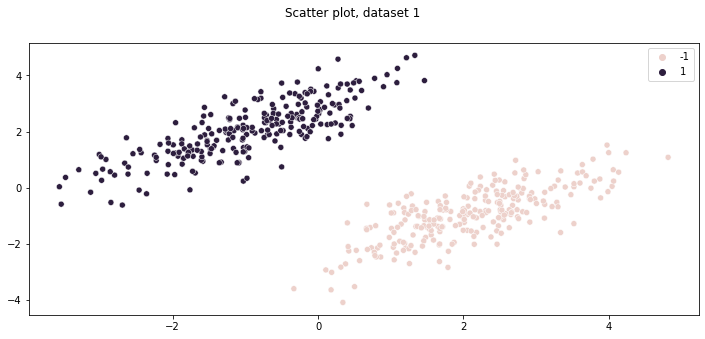

In [325]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5), sharey=True)
fig.suptitle("Scatter plot, dataset 1")

sns.scatterplot(
        x=X1[:, 0],
        y=X1[:, 1], 
        hue=y1,
        ax = axes)

<h4>Simple data set 2 creation code</h4>

In [326]:
X2 = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


display(X2.shape)
display(y2.shape)

display(X2[:5, :])
display(y2[:5])

(40, 2)

(40,)

array([[-0.44699, -2.8073 ],
       [-1.4621 , -2.4586 ],
       [ 0.10645,  1.9242 ],
       [-3.5944 , -4.0112 ],
       [-0.9888 ,  4.5718 ]])

array([0, 0, 0, 0, 0])

<AxesSubplot:>

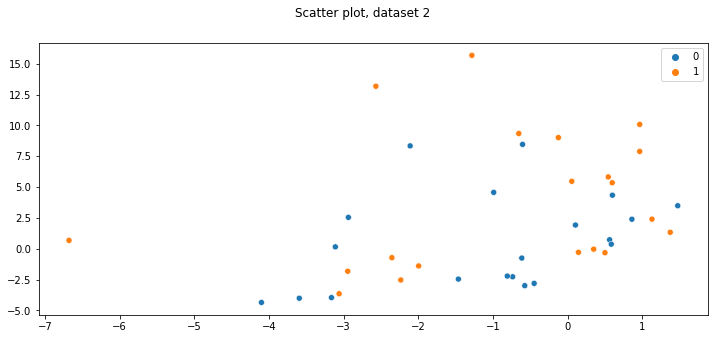

In [327]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5), sharey=True)
fig.suptitle("Scatter plot, dataset 2")

sns.scatterplot(
        x=X2[:, 0],
        y=X2[:, 1], 
        hue=y2,
        ax = axes)

<h4>Dataset 3 creation</h4>

use all 4 features of the iris data to predict target 0 and 1

In [328]:
iris = load_iris()
X3 = np.array(iris['data'][:100, :])
y3 = np.array(iris['target'][:100])

<h3>[Problem 2] Creating a code to solve the classification problem</h3>

In [329]:
def compute_score(y_true=None, y_pred=None):
    return pd.DataFrame({
                'Accuracy': [metrics.accuracy_score(y_true, y_pred)],
                'Precision': [metrics.precision_score(y_true, y_pred)],
                'Recall': [metrics.recall_score(y_true, y_pred)],
                'F1': [metrics.f1_score(y_true, y_pred)]
    })

In [330]:
def training_model(X=None, y=None, train_size=None, scaler=None, model=None, problem_type=0):
    X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size)
    model = make_pipeline(scaler, model)
    model.fit(X_train, y_train)
    if (problem_type == 0):
        return compute_score(y_test, model.predict(X_test))
    elif (problem_type == 1):
        return pd.DataFrame({'MSE': [metrics.mean_squared_error(y_test, model.predict(X_test))]})

<h4>Dataset 1</h4>

Logistic regression

In [331]:
training_model(X1, y1, 0.75, StandardScaler(), SGDClassifier(loss='log'))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


SVM

In [332]:
training_model(X1, y1, 0.75, StandardScaler(), SVC(gamma='auto'))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


Decision tree

In [333]:
training_model(X1, y1, 0.75, StandardScaler(), DecisionTreeClassifier())

,Accuracy,Precision,Recall,F1
0,0.992,0.982456,1.0,0.99115


<h4>Dataset 2</h4>

Logistic regression

In [334]:
training_model(X2, y2, 0.75, StandardScaler(), SGDClassifier(loss='log'))

,Accuracy,Precision,Recall,F1
0,0.5,0.428571,0.75,0.545455


SVM

In [335]:
training_model(X2, y2, 0.75, StandardScaler(), SVC(gamma='auto'))

,Accuracy,Precision,Recall,F1
0,0.4,0.0,0.0,0.0


Decision tree

In [336]:
training_model(X2, y2, 0.75, StandardScaler(), DecisionTreeClassifier())

,Accuracy,Precision,Recall,F1
0,0.7,0.666667,0.5,0.571429


<h4>Dataset 3</h4>

Logistic regression

In [337]:
training_model(X3, y3, 0.75, StandardScaler(), SGDClassifier(loss='log'))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


SVM

In [338]:
training_model(X3, y3, 0.75, StandardScaler(), SVC(gamma='auto'))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


Decision tree

In [339]:
training_model(X3, y3, 0.75, StandardScaler(), DecisionTreeClassifier())

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


<h4>[Problem 3] Creating a code to solve the regression problem</h4>

<h4>Load house price dataset</h4>

In [340]:
house_train = pd.read_csv('./train.csv')

In [341]:
X4 = np.array(house_train[['GrLivArea', 'YearBuilt']])
y4 = np.array(house_train['SalePrice'])

display(X4.shape)
display(y4.shape)

(1460, 2)

(1460,)

Linear regression

In [342]:
training_model(X4, y4, 0.75, StandardScaler(), SGDRegressor(), 1)

,MSE
0,1.959747e+09
